In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,zscore


In [2]:
df=pd.read_csv("/content/house_price (1).csv")
df.head(6)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247


In [3]:
#Q1. Perform basic EDA
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
print("\nShape of dataset:\n",df.shape)
print("Column names:\n",df.columns.tolist())
print("\nData types of each column:\n",df.dtypes)
print("\nMissing values:\n",df.isnull().sum())



Shape of dataset:
 (13200, 7)
Column names:
 ['location', 'size', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']

Data types of each column:
 location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

Missing values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [5]:
# Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

#a) Mean and Standard deviation
#b)Percentile method
#c) IQR(Inter quartile range method)
#d) Z Score method

#a) Mean and Standard deviation
mean_value=df['price_per_sqft'].mean()
std_deviation=df['price_per_sqft'].std()
lower_bound=mean_value - 3*std_deviation
upper_bound=mean_value + 3*std_deviation
df_mean_std=df[(df['price_per_sqft']>=lower_bound) & (df['price_per_sqft']<=upper_bound)]
print("a. Mean and Standard deviation \n outliers removed",df.shape[0]-df_mean_std.shape[0])


#b)Percentile method
lower_percentile =df['price_per_sqft'].quantile(0.05)
upper_percentile =df['price_per_sqft'].quantile(0.95)
df_percentile= df[(df['price_per_sqft']>=lower_percentile) & (df['price_per_sqft']<= upper_percentile)]
print("b. Percentile \n outliers removed",df.shape[0] - df_percentile.shape[0])

#c) IQR(Inter quartile range method)
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
IQR=Q3-Q1
lower_iqr =Q1- 1.5*IQR
upper_iqr= Q3+ 1.5*IQR
df_iqr=df[(df['price_per_sqft']>=lower_iqr) & (df['price_per_sqft']<=upper_iqr)]
print("c. IQR(Inter quartile range method) \n outliers removed",df.shape[0]-df_iqr.shape[0])


#d) Z Score method
df['zscore']=zscore(df['price_per_sqft'])
df_z=df[(df['zscore']< 3) & (df['zscore']> -3)]
print("d. Z Score method \n outliers removed",df.shape[0] - df_z.shape[0])


a. Mean and Standard deviation 
 outliers removed 5
b. Percentile 
 outliers removed 1320
c. IQR(Inter quartile range method) 
 outliers removed 1265
d. Z Score method 
 outliers removed 5


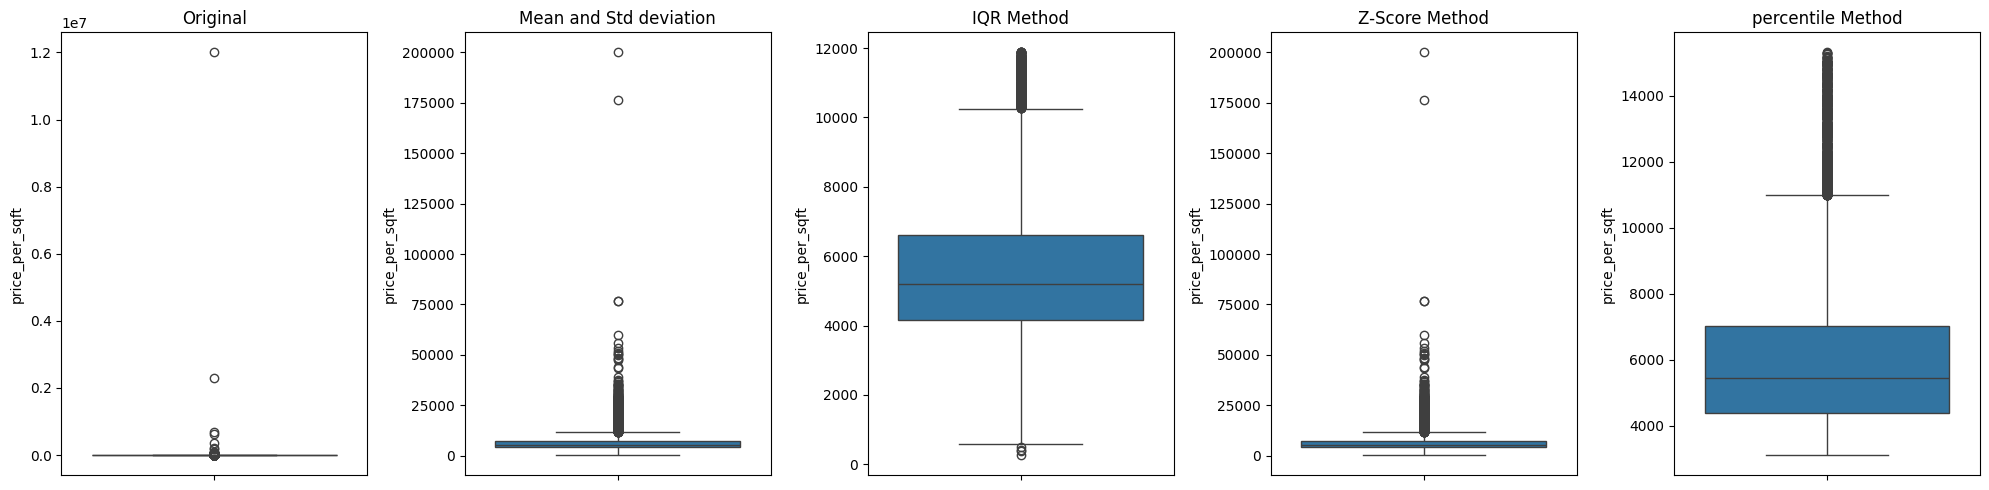

In [6]:
# Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
sns.boxplot(y=df['price_per_sqft'])
plt.title("Original")

plt.subplot(1,5,2)
sns.boxplot(y=df_mean_std['price_per_sqft'])
plt.title("Mean and Std deviation")

plt.subplot(1,5,3)
sns.boxplot(y=df_iqr['price_per_sqft'])
plt.title("IQR Method")

plt.subplot(1,5,4)
sns.boxplot(y=df_z['price_per_sqft'])
plt.title("Z-Score Method")

plt.subplot(1,5,5)
sns.boxplot(y=df_percentile['price_per_sqft'])
plt.title("percentile Method")

plt.tight_layout()
plt.show()


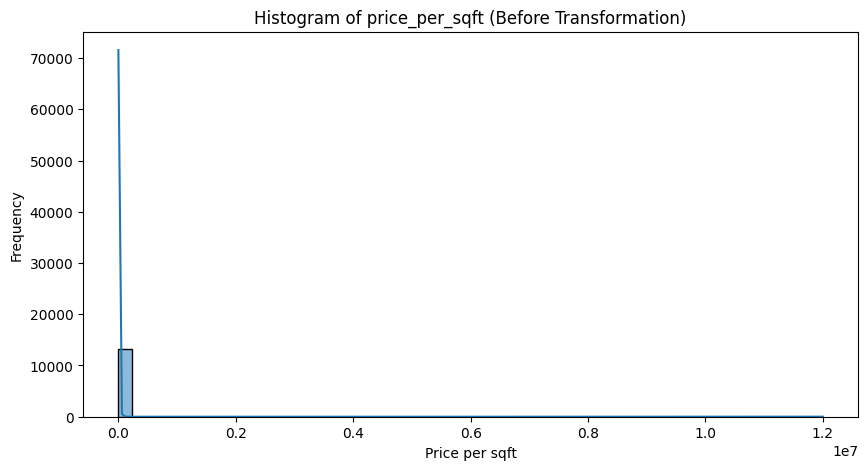

 Skewness before transformation: 108.26875024325159
 Kurtosis before transformation: 12090.633538860382


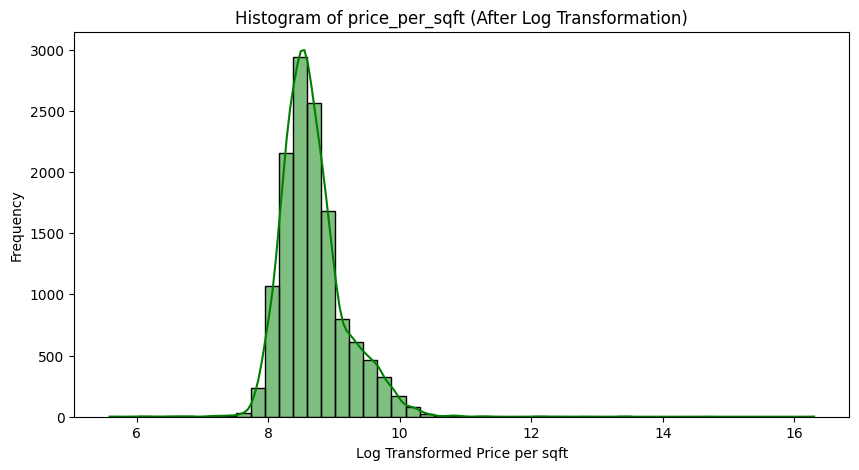

 Skewness after transformation: 1.4003259019533636
 Kurtosis after transformation: 9.203000543610957


In [7]:
#Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed.
#Check the skewness and kurtosis before and after the transformation.


import scipy.stats as stats

# 1. Plot Histogram before Transformation
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.title("Histogram of price_per_sqft (Before Transformation)")
plt.xlabel("Price per sqft")
plt.ylabel("Frequency")
plt.show()

# 2. Skewness and Kurtosis before transformation
print(" Skewness before transformation:", skew(df['price_per_sqft']))
print(" Kurtosis before transformation:", kurtosis(df['price_per_sqft']))

# 3. Log Transformation using log1p (handles zero values safely)
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# 4. Plot Histogram after Transformation
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_sqft_log'], bins=50, kde=True, color='green')
plt.title("Histogram of price_per_sqft (After Log Transformation)")
plt.xlabel("Log Transformed Price per sqft")
plt.ylabel("Frequency")
plt.show()

# 5. Skewness and Kurtosis after transformation
print(" Skewness after transformation:", skew(df['price_per_sqft_log']))
print(" Kurtosis after transformation:", kurtosis(df['price_per_sqft_log']))


Numerical Columns: 
 Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft', 'zscore',
       'price_per_sqft_log'],
      dtype='object')


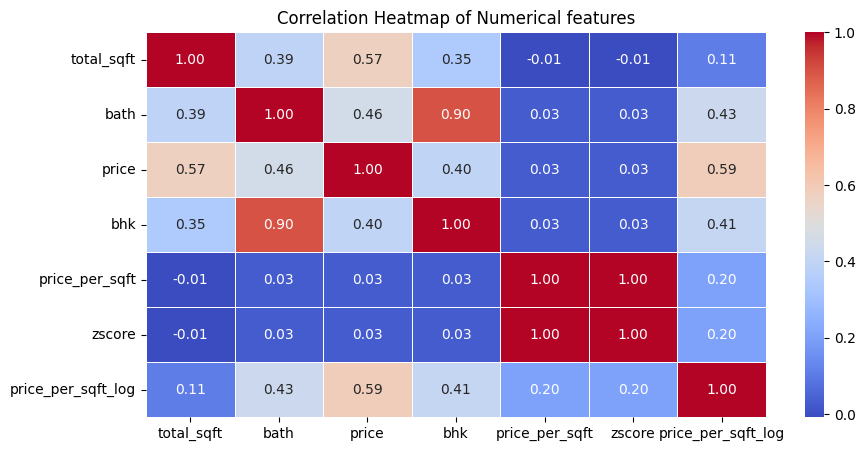

In [8]:
#Q5. Check the correlation between all the numerical columns and plot heatmap.

numerical_columns= df.select_dtypes(include=['int64', 'float64'])
print("Numerical Columns: \n",numerical_columns.columns)

#computing correlation matrix
corr_matrix =numerical_columns.corr()

#plotting heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap of Numerical features")
plt.show()


In [ ]:
#Q6. Draw Scatter plot between the variables to check the correlation between them.


import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
Numerical_cols = df.select_dtypes(include=['int64','float64']).columns

# Create the pairplot
pairplot_fig = sns.pairplot(df[Numerical_cols])

# Set the title on the pairplot's figure
pairplot_fig.fig.suptitle("Scatterplot Between Numerical Variables", y=1.02)

# Show the plot
plt.show()

In [ ]:
df.shape